In [ ]:
from google.colab import drive
drive.mount('/content/drive')

ValueError: Mountpoint must not already contain files

In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Mon Nov 18 21:55:56 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA A100-SXM4-40GB          Off | 00000000:00:04.0 Off |                    0 |
| N/A   32C    P0              41W / 400W |      2MiB / 40960MiB |      0%      Default |
|                                         |                      |             Disabled |
+-----------------------------------------+----------------------+--

In [ ]:
%cd MyDrive/YOLO/yolov5

/content/drive/MyDrive/YOLO/yolov5


In [10]:
!python train.py --img 640 --batch 16 --epochs 50 --data /content/drive/MyDrive/YOLO/yolov5/face_detection.yaml --weights yolov5n.pt --cache

Streaming output truncated to the last 5000 lines.
  with torch.cuda.amp.autocast(amp):
      46/49      2.94G    0.05605    0.04425          0        176        640:  91% 734/805 [00:59<00:05, 11.86it/s]/content/drive/MyDrive/YOLO/yolov5/train.py:412: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(amp):
      46/49      2.94G    0.05604    0.04426          0        256        640:  91% 736/805 [00:59<00:05, 11.97it/s]/content/drive/MyDrive/YOLO/yolov5/train.py:412: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(amp):
      46/49      2.94G    0.05604    0.04424          0        233        640:  91% 736/805 [00:59<00:05, 11.97it/s]/content/drive/MyDrive/YOLO/yolov5/train.py:412: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('

In [13]:
!ls /content/drive/MyDrive/YOLO/yolov5/runs/train/exp3/weights/best.pt

/content/drive/MyDrive/YOLO/yolov5/runs/train/exp3/weights/best.pt


In [16]:
!python detect.py --weights /content/drive/MyDrive/YOLO/yolov5/runs/train/exp3/weights/best.pt --img 640 --conf 0.25 --source /content/drive/MyDrive/YOLO/testImages/test2.png

detect: weights=['/content/drive/MyDrive/YOLO/yolov5/runs/train/exp3/weights/best.pt'], source=/content/drive/MyDrive/YOLO/testImages/test2.png, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_format=0, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-383-g1435a8ee Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)

Fusing layers... 
Model summary: 157 layers, 1760518 parameters, 0 gradients, 4.1 GFLOPs
image 1/1 /content/drive/MyDrive/YOLO/testImages/test2.png: 416x640 8 faces, 40.5ms
Speed: 0.7ms pre-process, 40.5ms inference, 555.3ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp7


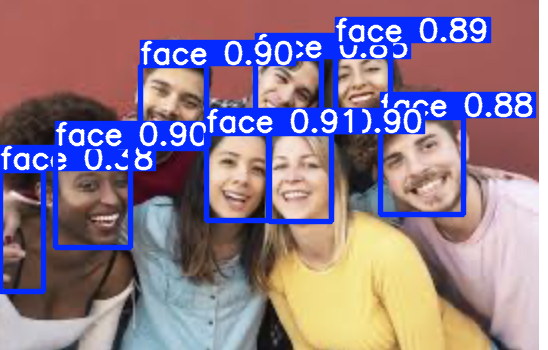

In [58]:
from PIL import Image
Image.open('/content/drive/MyDrive/YOLO/yolov5/runs/detect/exp7/test2.png')

In [24]:
# Create lighterweight onxx file
!python export.py --weights runs/train/exp3/weights/best.pt --img 640 --batch 1 --include onnx

export: data=data/coco128.yaml, weights=['runs/train/exp3/weights/best.pt'], imgsz=[640], batch_size=1, device=cpu, half=False, inplace=False, keras=False, optimize=False, int8=False, per_tensor=False, dynamic=False, cache=, simplify=False, mlmodel=False, opset=17, verbose=False, workspace=4, nms=False, agnostic_nms=False, topk_per_class=100, topk_all=100, iou_thres=0.45, conf_thres=0.25, include=['onnx']
YOLOv5 🚀 v7.0-383-g1435a8ee Python-3.10.12 torch-2.5.1+cu121 CPU

Fusing layers... 
Model summary: 157 layers, 1760518 parameters, 0 gradients, 4.1 GFLOPs

PyTorch: starting from runs/train/exp3/weights/best.pt with output shape (1, 25200, 6) (3.6 MB)
requirements: Ultralytics requirement ['onnx>=1.12.0'] not found, attempting AutoUpdate...
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 202.0 MB/s eta 0:00:00

requirements: AutoUpdate success ✅ 5.3s, installed 1 package: ['onnx>=1.12.0']
requirements: ⚠️ Restart runtime or rerun command for updates to take effect


ONNX: sta

In [27]:
!pip install onnxruntime

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 102.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 8.1 MB/s eta 0:00:00


Raw detections shape: (1, 25200, 6)
Sample detections (first 10): [[ 4.2638216e+00  6.2840233e+00  8.7044735e+00  1.1872065e+01
   2.3841858e-07  9.9996769e-01]
 [ 1.1727913e+01  5.6275177e+00  1.3014250e+01  9.2326059e+00
   8.9406967e-08  9.9997294e-01]
 [ 1.9963360e+01  3.3467970e+00  1.5172384e+01  5.3348346e+00
   8.9406967e-08  9.9995345e-01]
 [ 2.8761974e+01  3.3928699e+00  1.5339915e+01  4.6213870e+00
   8.9406967e-08  9.9995506e-01]
 [ 3.7031937e+01  2.3004656e+00  1.4772440e+01  5.1130962e+00
   2.9802322e-08  9.9997103e-01]
 [ 4.5663437e+01  2.3939333e+00  1.4838190e+01  4.7682614e+00
   2.9802322e-08  9.9997437e-01]
 [ 5.3549965e+01  2.4765196e+00  1.4741032e+01  4.8700333e+00
   1.1920929e-07  9.9997473e-01]
 [ 6.1444740e+01  2.2962065e+00  1.4808351e+01  4.6535501e+00
   2.9802322e-08  9.9997544e-01]
 [ 7.1378838e+01 -1.4280043e+00  1.1490264e+01  6.2729263e+00
   8.9406967e-08  9.9998426e-01]
 [ 7.9371857e+01 -1.4945278e+00  1.1234368e+01  6.1048779e+00
   1.1920929e-07 

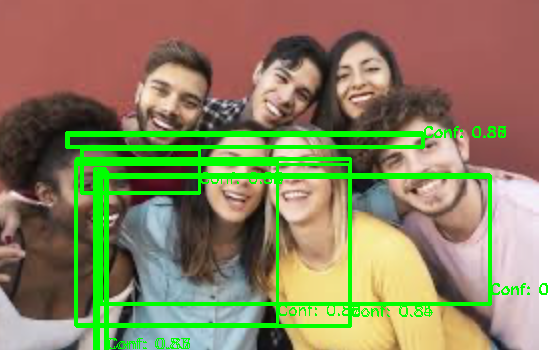

Output image saved to: /content/drive/MyDrive/YOLO/testImages/output_test2.png


In [49]:
import cv2
import numpy as np
import onnxruntime as ort
from google.colab.patches import cv2_imshow  # For Colab

# Define the ONNX model path
onnx_model_path = "/content/drive/MyDrive/YOLO/yolov5/runs/train/exp3/weights/best.onnx"

# Load the ONNX model
session = ort.InferenceSession(onnx_model_path)

# Preprocess the input image
def preprocess_image(img_path, img_size=640):
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (img_size, img_size))
    img = img / 255.0  # Normalize pixel values to [0, 1]
    img = np.transpose(img, (2, 0, 1))  # Convert to CHW format
    img = np.expand_dims(img, axis=0).astype(np.float32)  # Add batch dimension
    return img

# Parse and filter detections
def parse_detections(detections, confidence_threshold=0.8, iou_threshold=0.2):
    detections = np.squeeze(detections, axis=0)  # Remove batch dimension
    boxes = []
    confidences = []
    for detection in detections:
        x1, y1, x2, y2, confidence, class_prob = detection
        if confidence > confidence_threshold:  # Filter by confidence
            boxes.append([x1, y1, x2 - x1, y2 - y1])  # Convert to (x, y, w, h)
            confidences.append(confidence)

    # Apply NMS
    indices = cv2.dnn.NMSBoxes(boxes, confidences, confidence_threshold, iou_threshold)
    filtered_detections = []
    if len(indices) > 0:  # Ensure indices are not empty
        for i in indices.flatten():
            x, y, w, h = boxes[i]
            conf = confidences[i]
            filtered_detections.append((int(x), int(y), int(x + w), int(y + h), conf))
    return filtered_detections

# Draw bounding boxes on the image
def draw_boxes(image, detections):
    for x1, y1, x2, y2, conf in detections:
        # Draw the bounding box
        cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)
        # Add label and confidence score
        cv2.putText(image, f"Conf: {conf:.2f}", (x1, y1 - 10),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 1)
    return image

# Perform inference
def run_inference(img_path):
    img = preprocess_image(img_path)  # Preprocess the image
    inputs = {session.get_inputs()[0].name: img}
    outputs = session.run(None, inputs)  # Run inference
    return outputs[0]

# Test image path
test_image_path = "/content/drive/MyDrive/YOLO/testImages/test2.png"

# Run inference
raw_detections = run_inference(test_image_path)

# Debug: Print raw outputs
print("Raw detections shape:", raw_detections.shape)
print("Sample detections (first 10):", raw_detections[0][:10])

# Parse detections
detections = parse_detections(raw_detections)

# Print the number of faces detected
num_faces = len(detections)
print(f"Number of faces detected: {num_faces}")

# Load the original image
original_image = cv2.imread(test_image_path)

# Draw detections on the image
output_image = draw_boxes(original_image, detections)

# Display the result in Colab
cv2_imshow(output_image)

# Save the result
output_image_path = "/content/drive/MyDrive/YOLO/testImages/output_test2.png"
cv2.imwrite(output_image_path, output_image)

# Print the path of the saved image
print(f"Output image saved to: {output_image_path}")


In [54]:
!pip install onnxruntime onnxruntime-tools

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.7/212.7 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.5/55.5 kB 4.6 MB/s eta 0:00:00


In [55]:
!python -m onnxruntime.tools.convert_onnx_models runs/train/exp3/weights/ best.onnx

/usr/bin/python3: No module named onnxruntime.tools.convert_onnx_models
